In [1]:
import pyforest

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
categorical=df.dtypes[df.dtypes=='O'].index
categorical

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [6]:
df[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [7]:
df.index=df['PassengerId']
del df['PassengerId']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
del df['Ticket']

In [9]:
new_survived=pd.Categorical(df['Survived'])
new_survived=new_survived.rename_categories(['Died','Survived'])
new_survived.describe()

<IPython.core.display.Javascript object>

,counts,freqs
categories,,
Died,266,0.636364
Survived,152,0.363636


In [10]:
df['Survived']=new_survived
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,Died,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
893,Survived,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
894,Died,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
895,Died,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
896,Survived,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [11]:
new_pclass=pd.Categorical(df['Pclass'],ordered=True)
new_pclass=new_pclass.rename_categories(['Class1','Class2','Class3'])
new_pclass.describe()

<IPython.core.display.Javascript object>

,counts,freqs
categories,,
Class1,107,0.255981
Class2,93,0.222488
Class3,218,0.521531


In [12]:
df['Pclass']=new_pclass
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,Died,Class3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
893,Survived,Class3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
894,Died,Class2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
895,Died,Class3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
896,Survived,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [13]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [14]:
char_cabin=df['Cabin'].astype(str)
new_cabin=np.array([cabin[0] for cabin in char_cabin])
new_cabin=pd.Categorical(new_cabin)
new_cabin.describe()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,counts,freqs
categories,,
A,7,0.016746
B,18,0.043062
C,35,0.083732
D,13,0.031100
E,9,0.021531
F,8,0.019139
G,1,0.002392
n,327,0.782297


In [15]:
df['Cabin']=new_cabin
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,Died,Class3,"Kelly, Mr. James",male,34.5,0,0,7.8292,n,Q
893,Survived,Class3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,n,S
894,Died,Class2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,n,Q
895,Died,Class3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,n,S
896,Survived,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,n,S


In [16]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [17]:
missing=np.where(df['Age'].isnull()==True)
missing

<IPython.core.display.Javascript object>

(array([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
         84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
        132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
        199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
        256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
        292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
        380, 382, 384, 408, 410, 413, 416, 417], dtype=int64),)

Check the distribution of age

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

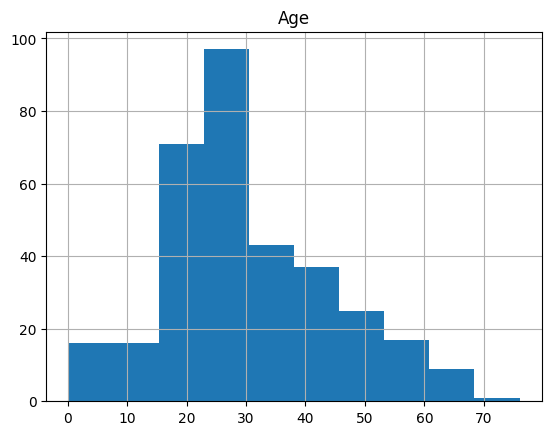

In [18]:
df.hist(column='Age')

most common age is 28. hence fillna with 28

In [19]:
df['Age']=df['Age'].fillna(28)
df['Age']

PassengerId
892     34.5
893     47.0
894     62.0
895     27.0
896     22.0
        ... 
1305    28.0
1306    39.0
1307    38.5
1308    28.0
1309    28.0
Name: Age, Length: 418, dtype: float64

Checking for outliers in Fare column

<Axes: >

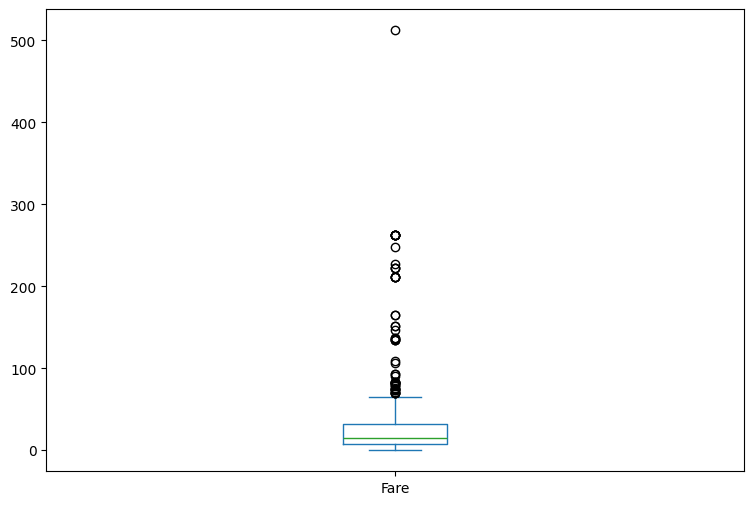

In [20]:
df['Fare'].plot(kind='box',figsize=(9,6))

one person paid the highest fare

In [21]:
index=np.where(df['Fare']==max(df['Fare']))
df.iloc[index]

<IPython.core.display.Javascript object>

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1235,Survived,Class1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B,C


Creating new feature 'Family' by combining parents and siblings columns

In [22]:
df['Family']=df['SibSp']+df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,
892,Died,Class3,"Kelly, Mr. James",male,34.5,0,0,7.8292,n,Q,0
893,Survived,Class3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,n,S,1
894,Died,Class2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,n,Q,0
895,Died,Class3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,n,S,0
896,Survived,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,n,S,2


In [23]:
max_fam=np.where(df['Family']==max(df['Family']))
df.iloc[max_fam]

<IPython.core.display.Javascript object>

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,
1080,Survived,Class3,"Sage, Miss. Ada",female,28.0,8,2,69.55,n,S,10
1234,Died,Class3,"Sage, Mr. John George",male,28.0,1,9,69.55,n,S,10
1252,Died,Class3,"Sage, Master. William Henry",male,14.5,8,2,69.55,n,S,10
1257,Survived,Class3,"Sage, Mrs. John (Annie Bullen)",female,28.0,1,9,69.55,n,S,10


In [24]:
summary=df.describe()
summary

,Age,SibSp,Parch,Fare,Family
count,418.000000,418.000000,418.000000,417.000000,418.000000
mean,29.805024,0.447368,0.392344,35.627188,0.839713
std,12.667969,0.896760,0.981429,55.907576,1.519072
min,0.170000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,35.750000,1.000000,0.000000,31.500000,1.000000
max,76.000000,8.000000,9.000000,512.329200,10.000000


In [26]:
survival_rates=df.groupby('Pclass')['Survived'].apply(lambda x:(x=='Survived').mean())
survival_rates

C:\Users\shali\AppData\Local\Temp\ipykernel_20808\4053335124.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates=df.groupby('Pclass')['Survived'].apply(lambda x:(x=='Survived').mean())


Pclass
Class1    0.467290
Class2    0.322581
Class3    0.330275
Name: Survived, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

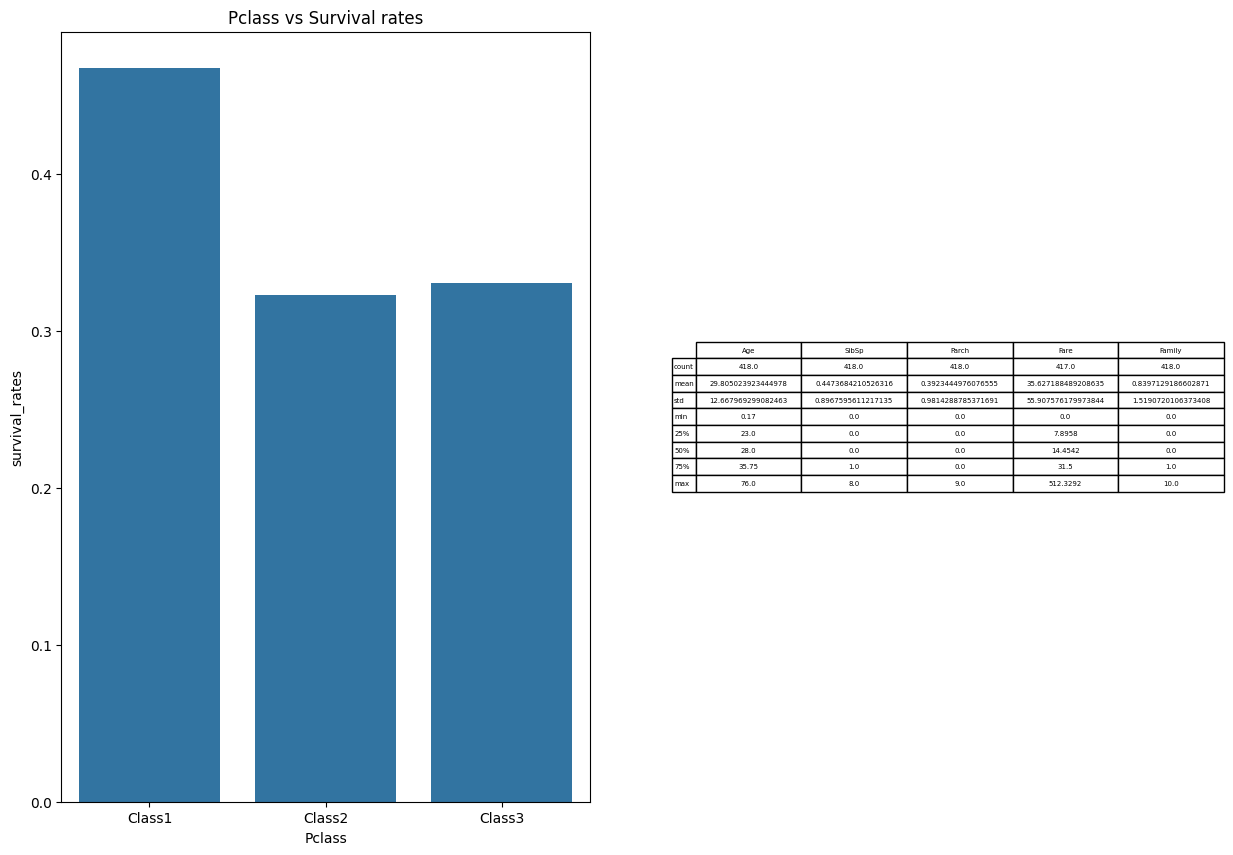

In [27]:
fig,axes=plt.subplots(1,2,figsize=(15,10))
sns.barplot(data=survival_rates,ax=axes[0])
axes[0].set_title('Pclass vs Survival rates')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('survival_rates')
axes[1].axis("off")
table=axes[1].table(cellText=summary.values,colLabels=summary.columns,rowLabels=summary.index,cellLoc='center',loc='center')
plt.show()